In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
#%matplotlib notebook
from matplotlib.widgets import Slider
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2025-03-26 19:14:47.691525: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-26 19:14:48.047255: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-26 19:14:48.777117: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC', dlmedblue='#4285F4')

In [3]:
def plt_softmax(my_softmax):
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    plt.subplots_adjust(bottom=0.35)

    axz0 = fig.add_axes([0.15, 0.10, 0.30, 0.03]) # [left, bottom, width, height]
    axz1 = fig.add_axes([0.15, 0.15, 0.30, 0.03])
    axz2 = fig.add_axes([0.15, 0.20, 0.30, 0.03])
    axz3 = fig.add_axes([0.15, 0.25, 0.30, 0.03])

    z3 = Slider(axz3, 'z3', 0.1, 10.0, valinit=4, valstep=0.1)
    z2 = Slider(axz2, 'z2', 0.1, 10.0, valinit=3, valstep=0.1)
    z1 = Slider(axz1, 'z1', 0.1, 10.0, valinit=2, valstep=0.1)
    z0 = Slider(axz0, 'z0', 0.1, 10.0, valinit=1, valstep=0.1)

    z = np.array(['z0','z1','z2','z3'])
    bar = ax[0].barh(z, height=0.6, width=[z0.val,z1.val,z2.val,z3.val], left=None, align='center')
    bars = bar.get_children()
    ax[0].set_xlim([0,10])
    ax[0].set_title("z input to softmax")

    a = my_softmax(np.array([z0.val,z1.val,z2.val,z3.val]))
    anames = np.array(['a0','a1','a2','a3'])
    sbar = ax[1].barh(anames, height=0.6, width=a, left=None, align='center',color=dlc["dldarkred"])
    sbars = sbar.get_children()
    ax[1].set_xlim([0,1])
    ax[1].set_title("softmax(z)")

    def update(val):
        bars[0].set_width(z0.val)
        bars[1].set_width(z1.val)
        bars[2].set_width(z2.val)
        bars[3].set_width(z3.val)
        a = my_softmax(np.array([z0.val,z1.val,z2.val,z3.val]))
        sbars[0].set_width(a[0])
        sbars[1].set_width(a[1])
        sbars[2].set_width(a[2])
        sbars[3].set_width(a[3])

        fig.canvas.draw_idle()

    z0.on_changed(update)
    z1.on_changed(update)
    z2.on_changed(update)
    z3.on_changed(update)

    plt.show()
 

In [4]:
def my_softmax(z):
    ez = np.exp(z)          # Element-wise exponential
    sm = ez/np.sum(ez)
    return(sm)

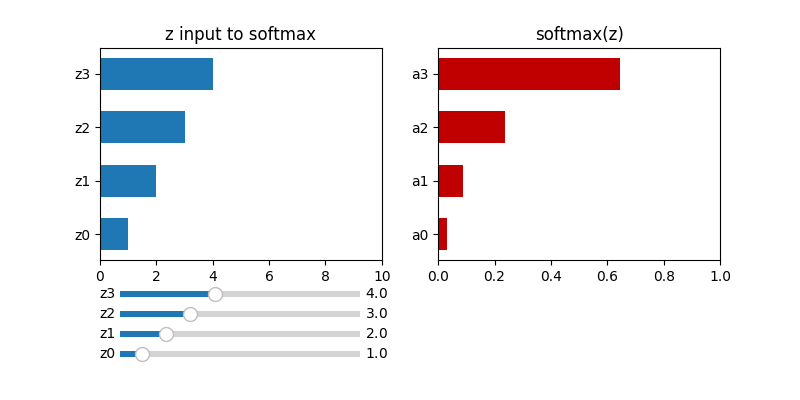

In [6]:
plt.close("all")
plt_softmax(my_softmax)

In [12]:
import matplotlib
import ipympl
print("matplot: ", matplotlib.__version__)
print("ipympl:", ipympl.__version__)

matplot:  3.10.1
ipympl: 0.9.7


# Tensorflow

The dataset:

In [7]:
centers = [[-5,2], [-2, -2], [1,2], [5,-2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state=30) # Generate isotropic Gaussian blobs for clustering

In [9]:
model = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='softmax'),
    ]
)

In [10]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

2025-03-26 19:32:19.086193: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-26 19:32:19.086488: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
model.fit(
    X_train, y_train, epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - loss: 1.3254 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.5119
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.2648
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.1500
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.1004
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.0665
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.0540
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.0463
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.0440
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0439


Because the softmax is integrated into the output layer, the output is a vector of probabilities

In [12]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred[:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
[[1.5536981e-03 1.7806597e-03 9.6686435e-01 2.9801305e-02]
 [9.9187464e-01 7.6561747e-03 4.4993460e-04 1.9310473e-05]]
largest value 0.9999995 smallest value 1.6059377e-09


# Preferred

More stable and accurate results can be obtained if the softmax and loss are combined during training.

In [15]:
preferred_model = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='linear')
    ]
)

In [17]:
preferred_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

In [18]:
preferred_model.fit(
    X_train, y_train, epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.8928 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.4647
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.1872
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.1030
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0749
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.0587
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.0449
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.0523
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.0422
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.0329


In [19]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
two example output vectors:
 [[-2.372733  -2.6193752  2.6465766 -1.1550324]
 [ 6.5543685  1.0343385 -5.1161704 -4.725649 ]]
largest value 12.730939 smallest value -11.749311


In [20]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[6.3910950e-03 4.9941326e-03 9.6701664e-01 2.1598129e-02]
 [9.9598926e-01 3.9896620e-03 8.5075399e-06 1.2572022e-05]]
largest value 0.9999999 smallest value 8.9238415e-11


In [21]:
for i in range(5):
    print(f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-2.372733  -2.6193752  2.6465766 -1.1550324], category: 2
[ 6.5543685  1.0343385 -5.1161704 -4.725649 ], category: 0
[ 4.598782   1.2108854 -4.156911  -3.9021327], category: 0
[-1.09545    3.6777627 -4.098609  -2.3885665], category: 1
[-0.48142642 -3.8491416   4.492373   -3.6447494 ], category: 2
